**Function 0 (import drive)**  <br>
Function: Mount Google Drive to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Function 0.5 (Check cuda availability)**

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
#For the paths
user = "Kalash"

**Function 1(Unzip the data)** <br>
Input: The link to the dataset <br>
Function: Unzip the dataset. Remove the MACOSX file <br>
Output: Folder containing dataset

In [ ]:
if user == "Kalash":
  !unzip /content/drive/MyDrive/GNR650_Project/ExpwCleaned.zip > /dev/null

else:
  !unzip /content/gdrive/MyDrive/EE782_Project/ExpwCleaned.zip > /dev/null

**Function 1.7 (Delete MACOSX)** <br>
Input: Input directory path <br>
Function: Print all files which are not images and delete them. Using Google colab <br>
Output: Cleaned directory

In [ ]:
import os
import shutil

def delete_non_images_and_macosx(input_directory):
    # List all files in the input directory
    files = os.listdir(input_directory)

    # Print non-image files and delete them
    for file in files:
        if file == '.DS_Store':
            continue

        file_path = os.path.join(input_directory, file)

        # Check if it's not an image file and not the __MACOSX folder
        if not file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')) and file != '__MACOSX':
            print(f"Deleting non-image file: {file}")
            if os.path.isdir(file_path):
                shutil.rmtree(file_path)
            else:
                os.remove(file_path)

    # Remove the __MACOSX folder if it exists
    macosx_folder = os.path.join(input_directory, '__MACOSX')
    if os.path.exists(macosx_folder):
        print("Deleting __MACOSX folder")
        shutil.rmtree(macosx_folder)

In [ ]:
# Example usage:
input_directory = '/content/ExpwCleaned'  # Replace with the actual input directory
delete_non_images_and_macosx(input_directory)

In [ ]:
# Example usage:
input_directory = '/content/__MACOSX'  # Replace with the actual input directory
delete_non_images_and_macosx(input_directory)

Deleting non-image file: ExpwCleaned


**Function 2 (csv to Dataframe)** <br>
Input: A csv file <br>
Function: import the csv file and add column names to the csv. convert to a suitable dataframe <br>
Output: Dataframe <br>

In [ ]:
csv_path = '/content/gdrive/MyDrive/EE782_Project/label_expw.csv'  # Change this path to match your file's location

if user == "Kalash":
  csv_path = '/content/drive/MyDrive/GNR650_Project/label_expw.csv'
# Read the CSV file into a Pandas DataFrame
import pandas as pd

column_names = [
    "Image name",
    "size",
    "neutral",
    "happiness",
    "surprise",
    "sadness",
    "anger",
    "disgust",
    "fear",
    "contempt",
    "unknown",
    "NF"
]


df = pd.read_csv(csv_path, header = None, names = column_names)

# Now, you can work with the DataFrame 'df'


In [ ]:
df.head(5)

,Image name,size,neutral,happiness,surprise,sadness,anger,disgust,fear,contempt,unknown,NF
0,awe_grandmother_214_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
1,mad_woman_303_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
2,fierce_european_896_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
3,annoyed_father_453_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0
4,mad_infant_734_0.png,"(0, 0, 48, 48)",0,0,0,0,0,0,10,0,0,0


**Function 4(Fetch image)** <br>
Input: A dataframe, a folder containing images <br>
Function: Select any value from the first column of a dataframe. Also note down the row from which the value was selected. Now the value will be the name of an image file. The image file will be stored inside of a folder. We want to access this image from the folder and plot it using matplotlib. Also we want to print the row of the dataframe. Image name and row must be correctly matched. <br>
Output: Image and row of the dataframe

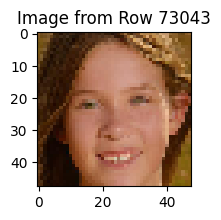

73043    amazed_family_537_0.png
Name: Image name, dtype: object
73043    (0, 0, 48, 48)
Name: size, dtype: object
73043    0
Name: neutral, dtype: int64
73043    10
Name: happiness, dtype: int64
73043    0
Name: surprise, dtype: int64
73043    0
Name: sadness, dtype: int64
73043    0
Name: anger, dtype: int64
73043    0
Name: disgust, dtype: int64
73043    0
Name: fear, dtype: int64
73043    0
Name: contempt, dtype: int64
73043    0
Name: unknown, dtype: int64
73043    0
Name: NF, dtype: int64


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

def fetch_image(dataframe, image_folder):
    # Check if the image folder exists
    if not os.path.exists(image_folder):
        raise FileNotFoundError("Image folder does not exist.")

    # Select a value from the first column of the DataFrame
    selected_row = dataframe.sample(1)
    selected_value = selected_row.iloc[0, 0]

    # Construct the image file path
    image_filename = os.path.join(image_folder, selected_value)

    # Check if the image file exists
    if not os.path.exists(image_filename):
        raise FileNotFoundError("Image file does not exist.")

    # Read and plot the image using Matplotlib
    image = plt.imread(image_filename)
    plt.figure(figsize=(3,2))
    plt.imshow(image)
    plt.title(f"Image from Row {selected_row.index[0]}")
    plt.show()

    # Print the selected row from the DataFrame
    for k, v in selected_row.items():
      print(v)

# Example usage
if __name__ == '__main__':
    # Load your DataFrame (replace 'your_dataframe.csv' with your actual DataFrame file)
    dataframe = df

    # Provide the path to the folder containing images
    image_folder = '/content/ExpwCleaned'

    # Call the function to fetch and plot an image
    fetch_image(dataframe, image_folder)



**Function 5 (Base VAE)** <br>
Input: raw Code for the base VAE <br>
Function: transform code to make it compatible with google colab. Implement a base VAE which can be used for creating VAE models <br>
Output: Class for the Base VAE

In [ ]:
import torch
from torch import nn
from typing import List, Any
from abc import abstractmethod

class BaseVAE(nn.Module):

    def __init__(self) -> None:
        super(BaseVAE, self).__init()

    def encode(self, input: torch.Tensor) -> List[torch.Tensor]:
        raise NotImplementedError

    def decode(self, input: torch.Tensor) -> Any:
        raise NotImplementedError

    def sample(self, batch_size: int, current_device: int, **kwargs) -> torch.Tensor:
        raise NotImplementedError

    def generate(self, x: torch.Tensor, **kwargs) -> torch.Tensor:
        raise NotImplementedError

    @abstractmethod
    def forward(self, *inputs: torch.Tensor) -> torch.Tensor:
        pass

    @abstractmethod
    def loss_function(self, *inputs: Any, **kwargs) -> torch.Tensor:
        pass


**Function 6 (Vanilla VAE)** <br>
Input: raw code for the vanilla VAE <br>
Function: Transform code to make it google Colab compatible. Then implement it so that it gives the Vanilla VAE class. now we have the base VAE class defined in a code cell just above. <br>
Output: The VanillaVAE class

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import List, Any

class VanillaVAE(nn.Module):
    def __init__(self,
                 in_channels: int,
                 latent_dim: int,
                 hidden_dims: List[int] = None,
                 **kwargs) -> None:
        super(VanillaVAE, self).__init__()

        self.latent_dim = latent_dim

        modules = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 256, 512]

        # Build Encoder
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, out_channels=h_dim,
                              kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(hidden_dims[-1] * 4, latent_dim)
        self.fc_var = nn.Linear(hidden_dims[-1] * 4, latent_dim)

        # Build Decoder
        modules = []

        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1] * 4)

        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_dims[i],
                                       hidden_dims[i + 1],
                                       kernel_size=3,
                                       stride=2,
                                       padding=1,
                                       output_padding=1),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU())
            )

        self.decoder = nn.Sequential(*modules)

        self.final_layer = nn.Sequential(
            nn.ConvTranspose2d(hidden_dims[-1],
                               hidden_dims[-1],
                               kernel_size=3,
                               stride=2,
                               padding=1,
                               output_padding=1),
            nn.BatchNorm2d(hidden_dims[-1]),
            nn.LeakyReLU(),
            nn.Conv2d(hidden_dims[-1], out_channels=1,
                      kernel_size=3, padding=1),
            nn.Tanh())

    def encode(self, input: torch.Tensor) -> List[torch.Tensor]:
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)
        return [mu, log_var]

    def decode(self, z: torch.Tensor) -> torch.Tensor:
        result = self.decoder_input(z)
        result = result.view(-1, 512, 2, 2)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu: torch.Tensor, logvar: torch.Tensor) -> torch.Tensor:
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, input: torch.Tensor, **kwargs) -> List[torch.Tensor]:
        mu, log_var = self.encode(input)
        z = self.reparameterize(mu, log_var)
        return [self.decode(z), input, mu, log_var]

    def loss_function(self, *args, **kwargs) -> dict:
        recons = args[0]
        input = args[1]
        mu = args[2]
        log_var = args[3]

        kld_weight = kwargs['M_N'] if 'M_N' in kwargs else 1.0
        recons_loss = F.mse_loss(recons, input)

        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim=1), dim=0)

        loss = recons_loss + kld_weight * kld_loss
        return {'loss': loss, 'Reconstruction_Loss': recons_loss.detach(), 'KLD': -kld_loss.detach()}

    def sample(self, num_samples: int, current_device: int, **kwargs) -> torch.Tensor:
        z = torch.randn(num_samples, self.latent_dim)
        z = z.to(current_device)
        samples = self.decode(z)
        return samples

    def generate(self, x: torch.Tensor, **kwargs) -> torch.Tensor:
        return self.forward(x)[0]


**Function 7 (Dataloaders)** <br>
Input: A folder containing images, a dataframe. The first column of the dataframe contains the filename of the image. The second column contains the size of the image. The next seven column contain values containing an emotion. 6 of these columns will have value 0 while the 7th will have value 10. <br>
Function: Create a dataloader from this data. <br>
Output: Dataloader

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image


class CustomDataset(Dataset):
    def __init__(self, data_folder, dataframe, transform=None):
        self.data = dataframe
        self.data_folder = data_folder
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_folder, self.data.iloc[idx, 0])
        image = Image.open(img_name)

        label = self.data.iloc[idx, 2:9].values.astype("float")

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Adjust to your desired image size
    transforms.ToTensor(),
])


**Function (7.05)** <br>
Input: Code for a dataloader <br>
Function: Modify the code so that I can use cuda with it to upload the code to a GPU while training <br>
Output: Updated dataloader code

In [ ]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, data_folder, dataframe, transform=None):
        self.data = dataframe
        self.data_folder = data_folder
        self.transform = transform

        # Filter out non-image files
        self.image_files = [f for f in os.listdir(data_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_folder, self.image_files[idx])
        image = Image.open(img_name)

        label = self.data.iloc[idx, 2:9].values.astype("float")

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Adjust to your desired image size
    transforms.ToTensor(),
])



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_folder = '/content/ExpwCleaned'
dataframe = df

dataset = CustomDataset(data_folder=data_folder, dataframe=dataframe, transform=transform)

batch_size = 32  # Adjust as needed
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)


**Function 7.1 (Print the dataloader)** <br>
Input: Dataloader <br>
Function: Print the dataloader's labels of batch 1 only. stop the processing once the printing is done Number of labels is equal to the batch size (default = 32) <br>
Output: Printed labels

In [ ]:
def print_dataloader_labels_batch1(dataloader, num_labels=32):
    for batch_idx, (data, labels) in enumerate(dataloader):
        if batch_idx == 0:
            labels_to_print = labels[:num_labels]
            print(f"Batch 1 Labels: {labels_to_print}")
            break  # Stop processing after printing

# Usage
# Assuming you have a DataLoader named 'data_loader'
print_dataloader_labels_batch1(train_loader, num_labels=32)



Batch 1 Labels: tensor([[ 0., 10.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.,  0.],
        [ 0., 10.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0., 10.,  0.],
        [ 0., 10.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., 10.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 10.,  0.,  0.],
        [10.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0., 10.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0., 10.,  0.,  0., 

**Function 7.25 (Emotion Dictionary)** <br>
Input: A list of 7 emotions, which are strings. The emotions are : "neutral",
    "happiness",
    "surprise",
    "sadness",
    "anger",
    "disgust",
    "fear" <br>
Function: Convert to a dictionary, which stores the name of each emotion against the correspionding number. <br>
Output: A dictionary

In [ ]:
def create_emotion_dictionary():
    emotions = [
        "neutral",
        "happiness",
        "surprise",
        "sadness",
        "anger",
        "disgust",
        "fear"
    ]

    emotion_dict = {emotion: index for index, emotion in enumerate(emotions)}

    return emotion_dict

# Usage
emotion_dict = create_emotion_dictionary()
print(emotion_dict)


{'neutral': 0, 'happiness': 1, 'surprise': 2, 'sadness': 3, 'anger': 4, 'disgust': 5, 'fear': 6}


**Function 7.5 (Access Labels)** <br>
Input1: Dataloader. Labels from the batch of a dataloader. A list of labels. Number of labels equal to batch size. each label is tensor of 7 numbers. <br>
Input2: A dictionary, containing key-value pairs, which are index and emotion <br>
Function: For each label, check which element in the tensor is non-zero. for that index number check the emotion in the dictionary. and assign that emotion to the label. We need to use this function while plotting the images. <br>
Output: A functionality <br>

In [ ]:
def assign_emotions_to_labels(labels, emotion_dict):
    labeled_emotions = []
    for label in labels:
        for index, value in enumerate(label):
            if value != 0:
                emotion = emotion_dict.get(index, "Unknown")
                labeled_emotions.append(emotion)
                break
    return labeled_emotions



**Function 8 (Plot images)** <br>
Input: A dataloader <br>
Function: Plot nicely the images inside of the dataloader using matplotlib in google colab. specify %matplotlib inline. The corresponding image labels should also be specified inside the dataloader using a print command. they need not be a part of the plot nor a part of the axis labels but the order of printing should remain the same. <br>
Output: Image plots

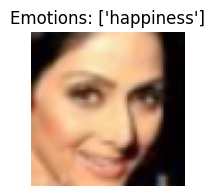

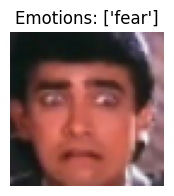

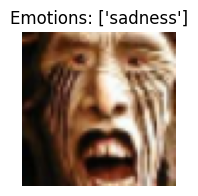

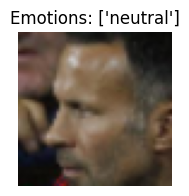

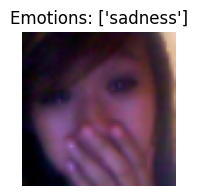

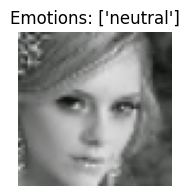

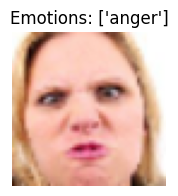

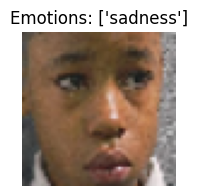

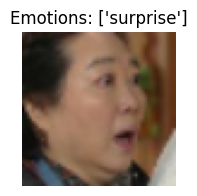

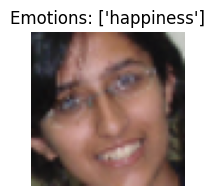

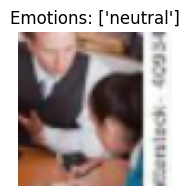

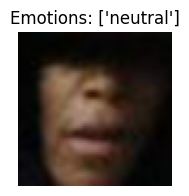

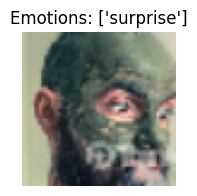

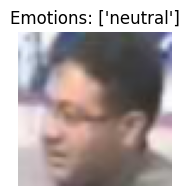

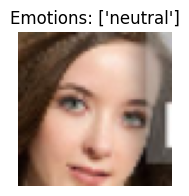

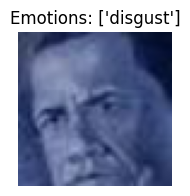

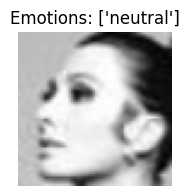

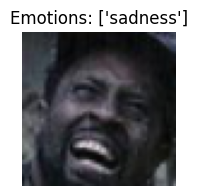

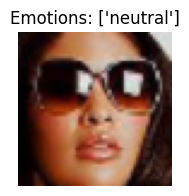

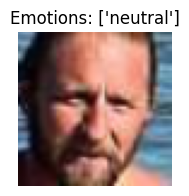

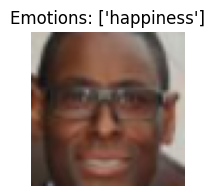

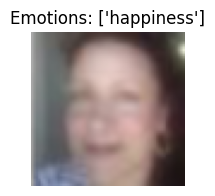

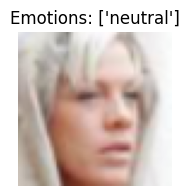

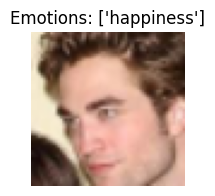

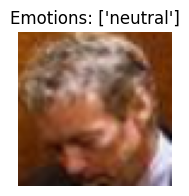

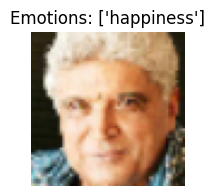

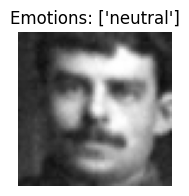

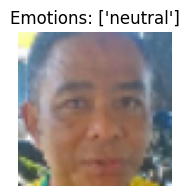

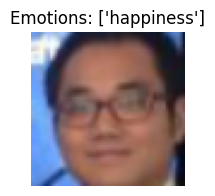

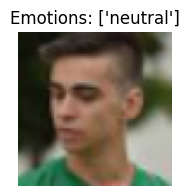

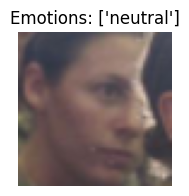

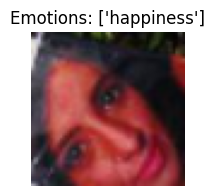

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have an emotion dictionary
# emotion_dict is the dictionary mapping indices to emotions
emotion_dict = {0: "neutral", 1: "happiness", 2: "surprise", 3: "sadness", 4: "anger", 5: "disgust", 6: "fear"}

def plot_images_with_labels(dataloader, num_images=10):
    for i, batch in enumerate(dataloader):
        images, labels = batch
        if i * len(images) > num_images:
            break

        for j in range(len(images)):
            image = images[j].permute(1, 2, 0).numpy()  # Reshape the image
            labeled_emotions = []
            label = labels[j]
            for index, value in enumerate(label):
                if value != 0:
                    emotion = emotion_dict.get(index, "Unknown")
                    labeled_emotions.append(emotion)
            plt.figure(figsize=(3, 2))
            plt.imshow(image)
            plt.axis('off')
            plt.title(f'Emotions: {labeled_emotions}')
            plt.show()

# Usage
# Assuming you have a DataLoader named 'data_loader'
plot_images_with_labels(train_loader, num_images=10)





**Function 8.5 (Instantiate VAE)** <br>
Input: VAE class <br>
Function: Instantiate the VAE class. Create an instance of your VanillaVAE model by specifying the necessary hyperparameters like in_channels, latent_dim, and any other required parameters. Make sure to set the model to training mode by calling model.train() <br>
Output: Instance of the class

In [ ]:
# Define hyperparameters
in_channels = 3  # Assuming RGB images, change to 1 for grayscale
latent_dim = 128
hidden_dims = [32, 64, 128, 256, 512]

# Instantiate VanillaVAE model
vae_model = VanillaVAE(in_channels=in_channels, latent_dim=latent_dim, hidden_dims=hidden_dims)

# Set the model to training mode
vae_model.train()

# Print the model architecture
print(vae_model)


VanillaVAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Se

**Function 8.75 (Initialize Optimizer)** <br>
Input: Learning rate (default = 3e-4), name of optimizer (adam) <br>
Function: Initialize the optimizer <br>
Output: Adam optimizer

In [ ]:
import torch.optim as optim

def initialize_optimizer(learning_rate=3e-4, optimizer_name='adam', params=None):
    """
    Initialize the optimizer.

    Parameters:
        learning_rate (float): The learning rate for the optimizer. Default is 3e-4.
        optimizer_name (str): The name of the optimizer. Default is 'adam'.
        params (iterable): Iterable of parameters to optimize. Typically, the model parameters.

    Returns:
        torch.optim.Optimizer: The initialized optimizer.
    """
    if optimizer_name.lower() == 'adam':
        optimizer = optim.Adam
    elif optimizer_name.lower() == 'sgd':
        optimizer = optim.SGD
    else:
        raise ValueError("Unsupported optimizer. Please choose 'adam' or 'sgd'.")

    return optimizer(params, lr=learning_rate)


# Example usage:
learning_rate = 3e-4
optimizer_name = 'adam'
model_parameters = vae_model.parameters()  # Replace my_model with your actual model
my_optimizer = initialize_optimizer(learning_rate, optimizer_name, params=model_parameters)


**Function 9 (Train VAE)** <br>
Input: An instance for Class VAE (name = vae_model), Dataloader which can work with cuda. (name = data_loader), optimizer (name = my_optimizer)<br>
Function: Train the VAE. You can use only 10 epocs for now. Use default hyperparameters. Keep the number of latent dims a variable with default = 2. Make use of device = cuda wherever you feel it is possible to speed up the operations. <br>
Output: Training loop which can be correctly executed <br>
Note: Wherever you feel something is insufficient, make a note to point it out

In [ ]:
log_interval = 100

def train_vae(vae_model, data_loader, my_optimizer, num_epochs=1, latent_dims=128):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    vae_model.to(device)

    # Define the optimizer
    optimizer = my_optimizer

    for epoch in range(num_epochs):
        for batch_idx, (data, _) in enumerate(data_loader):
            data = data.to(device)

            # Reconstruction and KL divergence
            results = vae_model(data)
            recons_batch = results[0]
            mu = results[2]
            logvar = results[3]

            # Calculate the loss
            loss_dict = vae_model.loss_function(recons_batch, data, mu, logvar)
            total_loss = loss_dict['loss']

            # Backpropagation and optimization
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            if batch_idx % log_interval == 0:
                print(f"Epoch {epoch}, Batch {batch_idx}, Loss: {total_loss.item()}")

        print(f"Epoch {epoch}, Loss: {total_loss.item()}")

    print("Training finished.")


In [ ]:
train_vae(vae_model, train_loader, my_optimizer)

NameError: ignored

**Function 10 (Print details)** <br>
Input: Dataloader, batch_size <br>
Function: Get details such as number of images <br>
Output: Details

In [ ]:
total_samples = len(train_loader.dataset)
batch_size = train_loader.batch_size
total_batches = total_samples // batch_size


print("Total Samples:", total_samples)
print("Batch Size:", batch_size)
print("Total Batches:", total_batches)

Total Samples: 84823
Batch Size: 32
Total Batches: 2650


**Function 11 (Plot Latent Dimensions)** <br>
Input: Model of the VAE <br>
Function: Plot the latent dimensional data inside of the VAE. Use some kind of coloring if possible according to the label of each of the classes involved. Labels have to be internally accessed from the Dataloader (name = train_loader) itself <br>
Output: A plot of the data inside the latent dimension

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import torch

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def plot_latent_dimensions(vae_model, data_loader, num_points=100, device='cuda'):
    # Set the model to evaluation mode
    vae_model.eval()

    # Lists to store latent representations and labels
    latent_representations = []
    all_labels = []

    # Iterate over the data in the DataLoader
    with torch.no_grad():
        for data, labels in data_loader:
            # Move data and labels to the same device as the model
            data, labels = to_device(data, device), to_device(labels, device)

            # Assuming vae_model.encode(data) returns a list of latent representations
            # Move each tensor to the CPU before appending
            latent_representations.extend([x.cpu().numpy() for x in vae_model.encode(data)])

            # Convert labels to numpy array
            all_labels.append(labels.cpu().numpy())

    # Concatenate lists to get numpy arrays
    latent_representations = np.concatenate(latent_representations, axis=0)
    all_labels = np.concatenate(all_labels, axis=0)

    # Randomly select a subset of data points
    if num_points < latent_representations.shape[0]:
        indices = np.random.choice(latent_representations.shape[0], num_points, replace=False)
        reduced_latent_representations = PCA(n_components=2).fit_transform(latent_representations[indices])
        subset_labels = all_labels[indices]
    else:
        reduced_latent_representations = PCA(n_components=2).fit_transform(latent_representations)
        subset_labels = all_labels

    # Create a scatter plot with color-coded points based on class labels
    unique_labels = np.unique(subset_labels)
    plt.figure(figsize=(10, 8))

    for label in unique_labels:
        indices = subset_labels == label
        plt.scatter(
            reduced_latent_representations[indices, 0],
            reduced_latent_representations[indices, 1],
            label=f'Class {label}',
            alpha=0.7
        )

    plt.title('Latent Dimension Visualization')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.legend()
    plt.show()

# Example usage:
# Assuming vae_model and train_loader are defined
plot_latent_dimensions(vae_model, train_loader, num_points=100)



# DDPM

## Step 1. Noise Scheduler

In [ ]:
class Diffusion():
  def __init__(self, noise_steps=100, beta_start=1e-4, beta_end=0.005, img_size=48, num_classes=7, c_in=3, c_out=3, device="cuda"):
    #Params
    self.img_size = img_size
    self.device = device
    self.c_in = c_in
    self.num_classes = num_classes

    #Define Beta
    self.noise_steps = noise_steps
    self.beta_start = beta_start
    self.beta_end = beta_end
    self.beta = self.linear_beta_schedule(self.noise_steps, self.beta_start, self.beta_end).to(device)

    #Define Alpha
    self.alpha = 1. - self.beta
    self.alpha_hat = torch.cumprod(self.alpha, dim=0) #cumulative product

  def linear_beta_schedule(self, timesteps, start=0.0001, end=0.02):
      return torch.linspace(start, end, timesteps)

  def sample_timesteps(self, n):
      return torch.randint(low=1, high=self.noise_steps, size=(n,))

  def forward_diffusion_sample(self, x, t, device = "cuda"):
      """
      Takes an image and a timestep as input and
      returns the noisy version of it
      """
      sqrt_alpha_hat = torch.sqrt(self.alpha_hat[t])[:, None, None, None].to(device)
      sqrt_one_minus_alpha_hat = torch.sqrt(1 - self.alpha_hat[t])[:, None, None, None].to(device)
      Ɛ = torch.randn_like(x)
      return sqrt_alpha_hat * x + sqrt_one_minus_alpha_hat * Ɛ, Ɛ

In [ ]:
  import numpy as np

  def show_tensor_image(image):
    reverse_transforms = transforms.Compose([
        transforms.Lambda(lambda t: (t + 1) / 2),
        transforms.Lambda(lambda t: t.permute(1, 2, 0)), # CHW to HWC
        transforms.Lambda(lambda t: t * 255.),
        transforms.Lambda(lambda t: t.numpy().astype(np.uint8)),
        transforms.ToPILImage(),
    ])

    # Take first image of batch
    if len(image.shape) == 4:
        image = image[0, :, :, :]
    plt.imshow(reverse_transforms(image))

In [ ]:
#Creating an instance of the diffusion model
diff_model = Diffusion(beta_end = 0.01, noise_steps = 50)

<ipython-input-21-ddfb57ba3795>:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images+1, int(idx/stepsize) + 1)


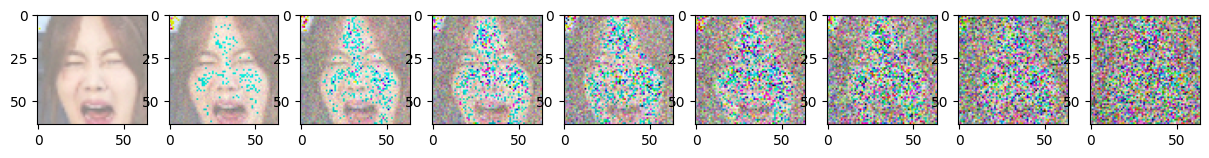

In [ ]:
# Simulate forward diffusion
device = "cuda" if torch.cuda.is_available() else "cpu"
image = next(iter(train_loader))[0].to(device)

plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 8
stepsize = int(diff_model.noise_steps/num_images)

for idx in range(0, diff_model.noise_steps, stepsize):
    t = torch.Tensor([idx]).type(torch.int64).to(device)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    img, noise = diff_model.forward_diffusion_sample(image, t)
    show_tensor_image(img.cpu())

## Step 2: The backward process = U-Net

### 2.1 : U-Net Conditional

In [ ]:
def one_param(m):
    "get model first parameter"
    return next(iter(m.parameters()))

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class SelfAttention(nn.Module):
    def __init__(self, channels):
        super(SelfAttention, self).__init__()
        self.channels = channels
        self.mha = nn.MultiheadAttention(channels, 4, batch_first=True)
        self.ln = nn.LayerNorm([channels])
        self.ff_self = nn.Sequential(
            nn.LayerNorm([channels]),
            nn.Linear(channels, channels),
            nn.GELU(),
            nn.Linear(channels, channels),
        )

    def forward(self, x):
        size = x.shape[-1]
        x = x.view(-1, self.channels, size * size).swapaxes(1, 2)
        x_ln = self.ln(x)
        attention_value, _ = self.mha(x_ln, x_ln, x_ln)
        attention_value = attention_value + x
        attention_value = self.ff_self(attention_value) + attention_value
        return attention_value.swapaxes(2, 1).view(-1, self.channels, size, size)


class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels, mid_channels=None, residual=False):
        super().__init__()
        self.residual = residual
        if not mid_channels:
            mid_channels = out_channels
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, mid_channels),
            nn.GELU(),
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1, bias=False),
            nn.GroupNorm(1, out_channels),
        )

    def forward(self, x):
        if self.residual:
            return F.gelu(x + self.double_conv(x))
        else:
            return self.double_conv(x)


class Down(nn.Module):
    def __init__(self, in_channels, out_channels, emb_dim=256):
        super().__init__()
        self.maxpool_conv = nn.Sequential(
            nn.MaxPool2d(2),
            DoubleConv(in_channels, in_channels, residual=True),
            DoubleConv(in_channels, out_channels),
        )

        self.emb_layer = nn.Sequential(
            nn.SiLU(),
            nn.Linear(
                emb_dim,
                out_channels
            ),
        )

    def forward(self, x, t):
        x = self.maxpool_conv(x)
        emb = self.emb_layer(t)[:, :, None, None].repeat(1, 1, x.shape[-2], x.shape[-1])
        return x + emb


class Up(nn.Module):
    def __init__(self, in_channels, out_channels, emb_dim=256):
        super().__init__()

        self.up = nn.Upsample(scale_factor=2, mode="bilinear", align_corners=True)
        self.conv = nn.Sequential(
            DoubleConv(in_channels, in_channels, residual=True),
            DoubleConv(in_channels, out_channels, in_channels // 2),
        )

        self.emb_layer = nn.Sequential(
            nn.SiLU(),
            nn.Linear(
                emb_dim,
                out_channels
            ),
        )

    def forward(self, x, skip_x, t):
        x = self.up(x)
        x = torch.cat([skip_x, x], dim=1)
        x = self.conv(x)
        emb = self.emb_layer(t)[:, :, None, None].repeat(1, 1, x.shape[-2], x.shape[-1])
        return x + emb


class UNet(nn.Module):
    def __init__(self, c_in=3, c_out=3, time_dim = 32):
        super().__init__()
        self.time_dim = time_dim
        self.inc = DoubleConv(c_in, 64)
        self.down1 = Down(64, 128, time_dim)
        self.sa1 = SelfAttention(128)
        self.down2 = Down(128, 256, time_dim)
        self.sa2 = SelfAttention(256)
        self.down3 = Down(256, 256, time_dim)
        self.sa3 = SelfAttention(256)

        self.bot1 = DoubleConv(256, 256)
        self.bot3 = DoubleConv(256, 256)

        self.up1 = Up(512, 128, time_dim)
        self.sa4 = SelfAttention(128)
        self.up2 = Up(256, 64, time_dim)
        self.sa5 = SelfAttention(64)
        self.up3 = Up(128, 64, time_dim)
        self.sa6 = SelfAttention(64)
        self.outc = nn.Conv2d(64, c_out, kernel_size=1)

    def pos_encoding(self, t, channels, device = "cuda"):
        inv_freq = 1.0 / (
            10000 ** (torch.arange(0, channels, 2, device=one_param(self).device).float() / channels)
        )
        pos_enc_a = torch.sin(t.repeat(1, channels // 2) * inv_freq)
        pos_enc_b = torch.cos(t.repeat(1, channels // 2) * inv_freq)
        pos_enc = torch.cat([pos_enc_a, pos_enc_b], dim=-1)
        return pos_enc

    def unet_forwad(self, x, t):
        x1 = self.inc(x)
        x2 = self.down1(x1, t)
        x2 = self.sa1(x2)
        x3 = self.down2(x2, t)
        x3 = self.sa2(x3)
        x4 = self.down3(x3, t)
        x4 = self.sa3(x4)

        x4 = self.bot1(x4)
        # x4 = self.bot2(x4)
        x4 = self.bot3(x4)

        x = self.up1(x4, x3, t)
        x = self.sa4(x)
        x = self.up2(x, x2, t)
        x = self.sa5(x)
        x = self.up3(x, x1, t)
        x = self.sa6(x)
        output = self.outc(x)
        return output

    def forward(self, x, t):
        t = t.unsqueeze(-1)
        t = self.pos_encoding(t, self.time_dim)
        return self.unet_forwad(x, t)


In [ ]:
class UNet_Conditional(UNet):
    '''
    Here the label is embedded and added to the time-stamp encoding
    '''
    def __init__(self, c_in=3, c_out=3, time_dim=32, num_classes=7):
      '''
      Arguments

      c_in (int, optional) : The number of input channels in the image
      c_out (int, optional) : The number of output channels in the image
      time_dim (int, optional) : The dimension of the encoding of time. Shape of t is (1, time_dim)
      num_classes (int, optional) : The different categories of emotions, i.e. happy, sad, etc
      '''
      super().__init__(c_in, c_out, time_dim)
      self.label_emb = nn.Embedding(num_classes, time_dim // 2) #Embedding the label (emotion)

    def forward(self, x, t, y=None):
        '''
        Arguments

        x (torch.tensor) : The input image
        t (torch.tensor): The time step
        y (int) : Label/emotion
        '''
        t = t.unsqueeze(-1) #Various timesteps
        t = self.pos_encoding(t, self.time_dim // 2)

        if y is not None:
            label_emb = self.label_emb(y)
            t = torch.cat((t, label_emb), 1)


        return self.unet_forwad(x, t)

In [ ]:
model = UNet_Conditional(time_dim=16)
print("Num params: ", sum(p.numel() for p in model.parameters()))
model.to("cuda")

Num params:  15446971


UNet_Conditional(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): GroupNorm(1, 64, eps=1e-05, affine=True)
      (2): GELU(approximate='none')
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): GroupNorm(1, 64, eps=1e-05, affine=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): GroupNorm(1, 64, eps=1e-05, affine=True)
          (2): GELU(approximate='none')
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): GroupNorm(1, 64, eps=1e-05, affine=True)
        )
      )
      (2): DoubleConv(
        (double_conv): Sequenti

### 2.2 Simple UNet

In [ ]:
from torch import nn
import math


class Block(nn.Module):
    def __init__(self, in_ch, out_ch, time_emb_dim, up=False):
        super().__init__()
        self.time_mlp =  nn.Linear(time_emb_dim, out_ch)
        if up:
            self.conv1 = nn.Conv2d(2*in_ch, out_ch, 3, padding=1)
            self.transform = nn.ConvTranspose2d(out_ch, out_ch, 4, 2, 1)
        else:
            self.conv1 = nn.Conv2d(in_ch, out_ch, 3, padding=1)
            self.transform = nn.Conv2d(out_ch, out_ch, 4, 2, 1)
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1)
        self.bnorm1 = nn.BatchNorm2d(out_ch)
        self.bnorm2 = nn.BatchNorm2d(out_ch)
        self.relu  = nn.ReLU()

    def forward(self, x, t, ):
        # First Conv
        h = self.bnorm1(self.relu(self.conv1(x)))
        # Time embedding
        time_emb = self.relu(self.time_mlp(t))
        # Extend last 2 dimensions
        time_emb = time_emb[(..., ) + (None, ) * 2]
        # Add time channel
        h = h + time_emb
        # Second Conv
        h = self.bnorm2(self.relu(self.conv2(h)))
        # Down or Upsample
        return self.transform(h)


class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        embeddings = math.log(10000) / (half_dim - 1)
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        embeddings = time[:, None] * embeddings[None, :]
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

        return embeddings


class SimpleUnet(nn.Module):
    """
    A simplified variant of the Unet architecture.
    """
    def __init__(self, image_channels = 3, out_dim = 3, time_emb_dim = 32):
        super().__init__()
        image_channels = image_channels
        down_channels = (64, 128, 256, 512, 1024)
        up_channels = (1024, 512, 256, 128, 64)
        out_dim = out_dim
        time_emb_dim = time_emb_dim

        # Time embedding
        self.time_mlp = nn.Sequential(
                SinusoidalPositionEmbeddings(time_emb_dim),
                nn.Linear(time_emb_dim, time_emb_dim),
                nn.ReLU()
               )

        # Initial projection
        self.conv0 = nn.Conv2d(image_channels, down_channels[0], 3, padding=1)

        '''
        Downsampling - self.downs is a list of Blocks like (B[t0, t1], B[t1, t2], ...) where B is the block function
        '''
        self.downs = nn.ModuleList([Block(down_channels[i], down_channels[i+1], time_emb_dim) for i in range(len(down_channels)-1)])

        '''
        Upsampling - self.downs is a list of Blocks like (B[t0, t1], B[t1, t2], ...) where B is the block function
        '''
        self.ups = nn.ModuleList([Block(up_channels[i], up_channels[i+1], time_emb_dim, up=True) for i in range(len(up_channels)-1)])
        self.output = nn.Conv2d(up_channels[-1], out_dim, 1)

    def forward(self, x, timestep):
        # Embedd time
        t = self.time_mlp(timestep)
        # Initial conv
        x = self.conv0(x)
        # Unet
        residual_inputs = []
        for down in self.downs:
            x = down(x, t)
            residual_inputs.append(x)
        for up in self.ups:
            residual_x = residual_inputs.pop()
            # Add residual x as additional channels
            x = torch.cat((x, residual_x), dim=1)
            x = up(x, t)
        return self.output(x)

In [ ]:
model2 = SimpleUnet()
print("Num params: ", sum(p.numel() for p in model2.parameters()))
model2

Num params:  62438883


SimpleUnet(
  (time_mlp): Sequential(
    (0): SinusoidalPositionEmbeddings()
    (1): Linear(in_features=32, out_features=32, bias=True)
    (2): ReLU()
  )
  (conv0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (downs): ModuleList(
    (0): Block(
      (time_mlp): Linear(in_features=32, out_features=128, bias=True)
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transform): Conv2d(128, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bnorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
    )
    (1): Block(
      (time_mlp): Linear(in_features=32, out_features=256, bias=True)
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (transfor

## Step 3 : Loss Function

In [ ]:
def get_loss(model, x_0, t, label):
    x_noisy, noise = diff_model.forward_diffusion_sample(x_0, t)
    noise_pred = model(x_noisy, t, label)
    return F.l1_loss(noise, noise_pred)

## Step 4 : Sampling

In [ ]:
def get_index_from_list(vals, t, x_shape, device = "cuda"):
    """
    Returns a specific index t of a passed list of values vals
    while considering the batch dimension.
    """
    t = t.to(device)
    batch_size = t.shape[0]
    out = vals.gather(-1, t)
    return out.reshape(batch_size, *((1,) * (len(x_shape) - 1))).to(t.device)

In [ ]:
#To pre-compute the variables for the backward pass (denoising phase)
class DiffusionVariables:
  def __init__(self, diff_model):
    self.alphas_cumprod = torch.cumprod(diff_model.alpha, axis=0)
    self.sqrt_alphas_cumprod = torch.sqrt(self.alphas_cumprod)
    self.sqrt_one_minus_alphas_cumprod = torch.sqrt(1. - self.alphas_cumprod)

    self.alphas_cumprod_prev = F.pad(self.alphas_cumprod[:-1], (1, 0), value=1.0)
    self.sqrt_recip_alphas = torch.sqrt(1.0 / diff_model.alpha)

    self.posterior_variance = diff_model.beta * (1. - self.alphas_cumprod_prev) / (1. - self.alphas_cumprod)


In [ ]:
@torch.no_grad()
def sample_timestep(x, t, label, model, diff_model, diff_var):
    """
    Calls the model to predict the noise in the image and returns
    the denoised image.
    Applies noise to this image, if we are not in the last step yet.

    Arguments
    x : noisy image
    t : timestep
    model : The backbone (UNet)
    diff_model : The diffusion parameters
    diff_var : Precomputed diff_vars
    """
    betas_t = get_index_from_list(diff_model.beta, t, x.shape)
    sqrt_one_minus_alphas_cumprod_t = get_index_from_list(diff_var.sqrt_one_minus_alphas_cumprod, t, x.shape)
    sqrt_recip_alphas_t = get_index_from_list(diff_var.sqrt_recip_alphas, t, x.shape)

    # Call model (current image - noise prediction)
    model_mean = sqrt_recip_alphas_t * (x - betas_t * model(x, t, label) / sqrt_one_minus_alphas_cumprod_t)
    posterior_variance_t = get_index_from_list(diff_var.posterior_variance, t, x.shape)

    if t == 0:
        # The t's are offset from the t's in the paper
        return model_mean
    else:
        noise = torch.randn_like(x)
        return model_mean + torch.sqrt(posterior_variance_t) * noise

@torch.no_grad()
def sample_plot_image(model, diff_model, diff_var, label, IMG_SIZE = 64, noise_steps = 50, device = "cuda"):
    # Sample noise
    img_size = IMG_SIZE
    img = torch.randn((1, 3, img_size, img_size), device=device)
    plt.figure(figsize=(15,15))
    plt.axis('off')
    num_images = 10
    stepsize = int(noise_steps/num_images)

    for i in range(0, noise_steps)[::-1]:
        t = torch.full((1,), i, device=device, dtype=torch.long)
        img = sample_timestep(img, t, label, model, diff_model, diff_var)
        # Edit: This is to maintain the natural range of the distribution
        img = torch.clamp(img, -1.0, 1.0)
        if i % stepsize == 0:
            plt.subplot(1, num_images, int(i/stepsize)+1)
            show_tensor_image(img.detach().cpu())
    plt.show()

In [ ]:
diff_vars = DiffusionVariables(diff_model)

<ipython-input-31-d37f22b7035c>:46: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images, int(i/stepsize)+1)


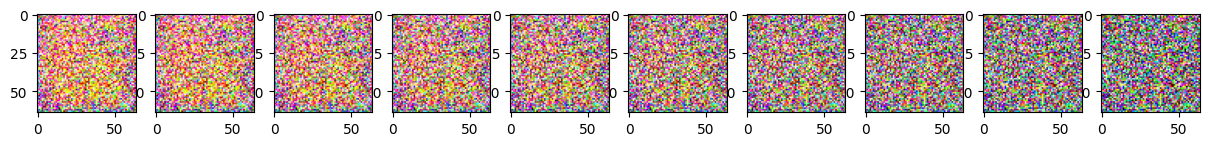

In [ ]:
sample_plot_image(model, diff_model, diff_vars, torch.tensor([1], device = "cuda"))

## Step 5 : Training

In [ ]:
!nvidia-smi

In [ ]:
#The Dataset & rain_loader
dataset = CustomDataset(data_folder=data_folder, dataframe=dataframe, transform=transform)

batch_size = 16  # Adjust as needed
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=2)

In [ ]:
def embedding_labels(labels):
  label_idx_list : list = []
  for label in labels:
    for idx, val in enumerate(label):
      if val != 0:
        label_idx_list.append(idx)

  return torch.tensor(label_idx_list)

In [ ]:
from torch.optim import Adam

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
optimizer = Adam(model.parameters(), lr=0.001)
epochs = 10 # Try more!


for epoch in range(epochs):
    for batch_idx, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      embed_labels = embedding_labels(labels)
      embed_labels = embed_labels.to(device)

      optimizer.zero_grad()
      t = torch.randint(0, diff_model.noise_steps, (batch_size,), device=device).long()
      loss = get_loss(model, images, t, embed_labels)
      loss.backward()
      optimizer.step()

      #Logging
      if batch_idx%10 == 0:
        print(f"Epoch {epoch} | Batch {batch_idx} | Loss: {loss.item()} ")
        #sample_plot_image(model, diff_model, diff_vars, torch.t(embed_labels))